In [1]:
# -----------------------------------------------------------
# Penguin 種 (Adélie / Chinstrap / Gentoo) を分類する決定木
# -----------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


## データの確認

In [ ]:
# 1. データ読込
df_penguin = sns.load_dataset("penguins")

print("データの先頭5行:")
print(df_penguin.head())

データの先頭5行:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [5]:
print("\nデータの情報:")
print(df_penguin.info())

print("\nデータサイズ")
print(df_penguin.shape)

print("\n欠損値の確認:")
print(df_penguin.isnull().sum())


データの情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

データサイズ
(344, 7)

欠損値の確認:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


/tmp/ipykernel_6101/2664980081.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


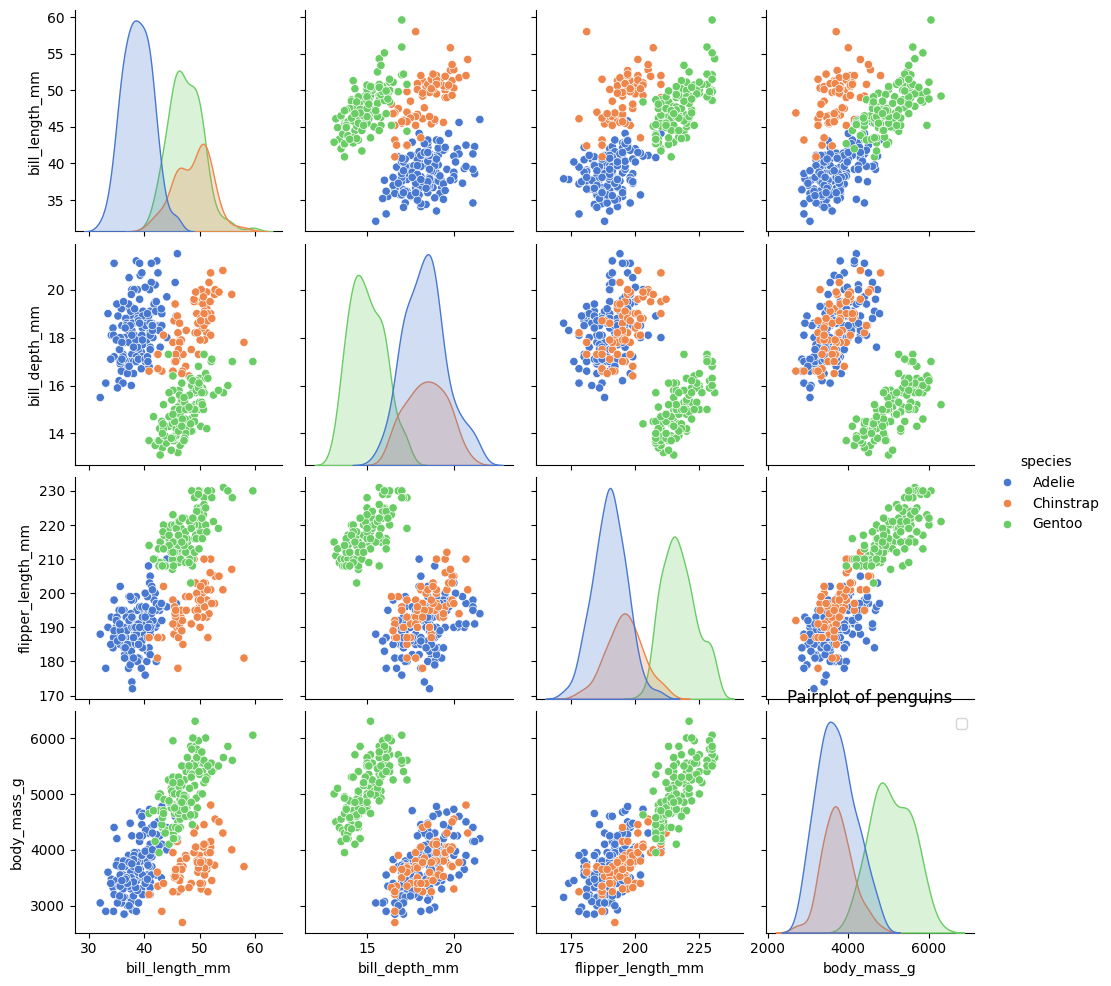

In [ ]:
sns.pairplot(df_penguin, hue='species', palette = 'muted')
plt.legend()
plt.title('Pairplot of penguins')
plt.savefig('./img/pairplot.png')

## データの前処理

In [32]:
# 欠損値は削除
p_data = df_penguin.dropna()

# ダミー変数の作成
p_data = pd.get_dummies(p_data, columns=["island", "sex"], drop_first=True)

# 特徴量と目的変数
# 目的変数はペンギンの種
feature_cols = ["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm", "body_mass_g", 
                "island_Dream", "island_Torgersen"]
X = p_data[feature_cols]
y = p_data["species"]         

In [33]:
# 2. 学習用 / テスト用に分割（層化）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(266, 6) (266,)
(67, 6) (67,)


In [35]:
# 3. 決定木モデル
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [36]:
# 4. 評価
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy:", accuracy_score(y_test, clf.predict(X_test)))

# 混同行列
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
print("\nConfusion matrix\n", cm_df)

Train accuracy: 0.981203007518797
Test  accuracy: 0.9552238805970149

Confusion matrix
            Adelie  Chinstrap  Gentoo
Adelie         29          0       0
Chinstrap       1         13       0
Gentoo          2          0      22


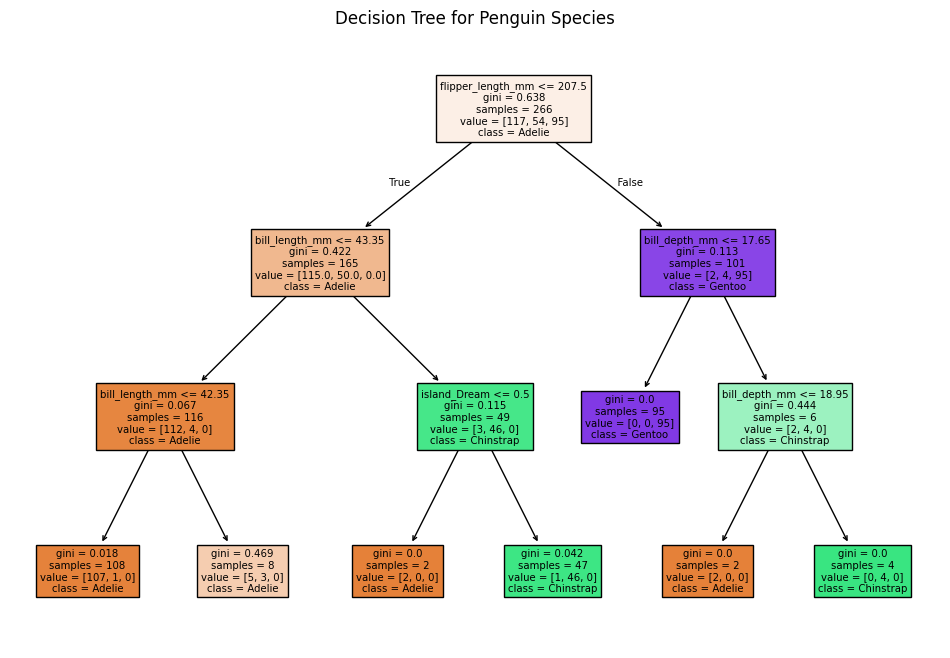

In [37]:
# 5. 可視化
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_cols,
          class_names=clf.classes_, filled=True)
plt.title("Decision Tree for Penguin Species")
plt.show()